     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  
0           1  
1           1  
2  

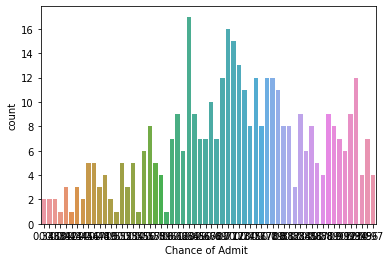

ValueError: ignored

In [8]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
data = pd.read_csv('/archive (5).zip')
data.head()
data.shape
X = data.iloc[:,:-1]
X.head()
y = data.iloc[:,-1]
y.head()
print(X)
print(y)
data['Chance of Admit '].value_counts()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
sns.countplot(x='Chance of Admit ',data=data)
plt.show()
X_train.shape
X_train.head()
y_test.shape
y_test.head()
from sklearn.metrics import accuracy_score
max_accuracy = 0

from sklearn.neighbors import KNeighborsClassifier


for x in range(1,100):
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
print(best_x)

model = KNeighborsClassifier(n_neighbors=best_x)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
filename = 'knn.sav'
pickle.dump(model, open(filename, 'wb'))
acc=(metrics.accuracy_score(y_pred,y_test)*100)
print("Accuracy is:",acc)
cm1 = metrics.confusion_matrix(y_pred,y_test)

total1=sum(sum(cm1))


sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)